In [1]:
from cathsim.utils import  make_env, make_dm_env
from rl.sb3.sb3_utils import get_config, make_experiment, make_scene, EXPERIMENT_PATH
from rl.sb3.evaluation import evaluate_policy

from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

from stable_baselines3 import SAC
import scipy.stats as stats

# Extras, disable if not needed
from pprint import pprint
import mergedeep
import matplotlib.patches as patches
import matplotlib
import seaborn as sns

plt.style.use('test')
colors = sns.color_palette('deep')
# colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=colors)

# Constants

phantoms = ['phantom3', 'low_tort', 'phantom4']
targets = ['bca', 'lcca']
algorithm_configs = ['full_w_her_w_sampling', 'full', 'full_w_her']
BASE_IMAGES = {
    'phantom3': Path.cwd().parent.parent / 'figures' / 'phantom3.png',
    'phantom4': Path.cwd().parent.parent / 'figures' / 'phantom4.png',
    'low_tort': Path.cwd().parent.parent / 'figures' / 'low_tort.png',
}

experiment_names_mapping = OrderedDict({
    'pixels': 'Image',
    'pixels_mask': 'Image+Mask',
    'internal': 'Internal',
    'internal_pixels': 'Internal+Image',
    'full': 'ENN',
    # 'full_w_her': 'AutoCath+HER',
    # 'full_w_her_w_sampling': 'AutoCath+HER+Sampling',    
})
    
page_width = 5.50


# checking if the base images exist
for base_image in BASE_IMAGES.values():
    assert base_image.exists()

seed = 0


def get_path(algorithm_config, phantom, target, seed=0)-> tuple:
    path = Path(f'{phantom}/{target}/{algorithm_config}')
    model_path, _, eval_path = make_experiment(path)
    assert model_path.exists(), f'{model_path} does not exist'
    assert eval_path.exists(), f'{eval_path} does not exist'
    models = list(model_path.glob('*.zip'))
    evals = list(eval_path.glob('*.npz'))
    return models[seed], evals[seed]


model = SAC

In [8]:
# initialize the environment
config = get_config(algorithm_configs[0])
config['task_kwargs']['target'] = targets[0]
pprint(config)
env = make_env(config)

{'algo_kwargs': {'policy': 'MultiInputPolicy',
                 'policy_kwargs': {'features_extractor_class': <class 'rl.feature_extractors.custom_extractor.CustomExtractor'>},
                 'replay_buffer_class': <class 'stable_baselines3.her.her_replay_buffer.HerReplayBuffer'>},
 'env_kwargs': {'gym_version': 'gym'},
 'task_kwargs': {'image_size': 80,
                 'sample_target': True,
                 'target': 'bca',
                 'use_pixels': True,
                 'use_segment': True},
 'train_kwargs': {'algo': 'sac',
                  'device': 'cuda',
                  'evaluate': False,
                  'n_envs': None,
                  'n_runs': 2,
                  'time_steps': 600000},
 'wrapper_kwargs': {'channel_first': False,
                    'grayscale': True,
                    'time_limit': 300,
                    'use_obs': ['pixels',
                                'guidewire',
                                'joint_pos',
                         

/home/tudorjnu/.miniconda3/envs/cathsim-dev/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


## HER Analysis

In [13]:
seed = 0
hindsight_model_path = get_path(algorithm_configs[0], phantoms[0], targets[0])[0]

model = model.load(hindsight_model_path)

Using custom extractor
Using custom extractor
Using custom extractor


### Test Hindsight

In [10]:
# initialize the environment
config = get_config(algorithm_configs[0])
config['task_kwargs']['target'] = targets[0] # set the target to bca
pprint(config)
env = make_env(config)


{'algo_kwargs': {'policy': 'MultiInputPolicy',
                 'policy_kwargs': {'features_extractor_class': <class 'rl.feature_extractors.custom_extractor.CustomExtractor'>},
                 'replay_buffer_class': <class 'stable_baselines3.her.her_replay_buffer.HerReplayBuffer'>},
 'env_kwargs': {'gym_version': 'gym'},
 'task_kwargs': {'image_size': 80, 'use_pixels': True, 'use_segment': True},
 'train_kwargs': {'algo': 'sac',
                  'device': 'cuda',
                  'evaluate': False,
                  'n_envs': None,
                  'n_runs': 2,
                  'time_steps': 600000},
 'wrapper_kwargs': {'channel_first': False,
                    'grayscale': True,
                    'time_limit': 300,
                    'use_obs': ['pixels',
                                'guidewire',
                                'joint_pos',
                                'joint_vel']}}


In [7]:
results_bca = evaluate_policy(model, env)

100%|██████████| 10/10 [00:51<00:00,  5.16s/it]


In [13]:
config['task_kwargs']['target'] = targets[1] # set the target to lcca
pprint(config)
env = make_env(config)

{'algo_kwargs': {'policy': 'MultiInputPolicy',
                 'policy_kwargs': {'features_extractor_class': <class 'rl.feature_extractors.custom_extractor.CustomExtractor'>},
                 'replay_buffer_class': <class 'stable_baselines3.her.her_replay_buffer.HerReplayBuffer'>},
 'env_kwargs': {'gym_version': 'gym'},
 'task_kwargs': {'image_size': 80,
                 'target': 'lcca',
                 'use_pixels': True,
                 'use_segment': True},
 'train_kwargs': {'algo': 'sac',
                  'device': 'cuda',
                  'evaluate': False,
                  'n_envs': None,
                  'n_runs': 2,
                  'time_steps': 600000},
 'wrapper_kwargs': {'channel_first': False,
                    'grayscale': True,
                    'time_limit': 300,
                    'use_obs': ['pixels',
                                'guidewire',
                                'joint_pos',
                                'joint_vel']}}


/home/tudorjnu/.miniconda3/envs/cathsim-dev/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [14]:
results_lcca = evaluate_policy(model, env)

100%|██████████| 10/10 [05:47<00:00, 34.78s/it]


### Testing random goal generation

{'algo_kwargs': {'policy': 'MultiInputPolicy',
                 'policy_kwargs': {'features_extractor_class': <class 'rl.feature_extractors.custom_extractor.CustomExtractor'>},
                 'replay_buffer_class': <class 'stable_baselines3.her.her_replay_buffer.HerReplayBuffer'>},
 'env_kwargs': {'gym_version': 'gym'},
 'task_kwargs': {'image_size': 80,
                 'sample_target': True,
                 'target': 'bca',
                 'use_pixels': True,
                 'use_segment': True},
 'train_kwargs': {'algo': 'sac',
                  'device': 'cuda',
                  'evaluate': False,
                  'n_envs': None,
                  'n_runs': 2,
                  'time_steps': 600000},
 'wrapper_kwargs': {'channel_first': False,
                    'grayscale': True,
                    'time_limit': 300,
                    'use_obs': ['pixels',
                                'guidewire',
                                'joint_pos',
                         

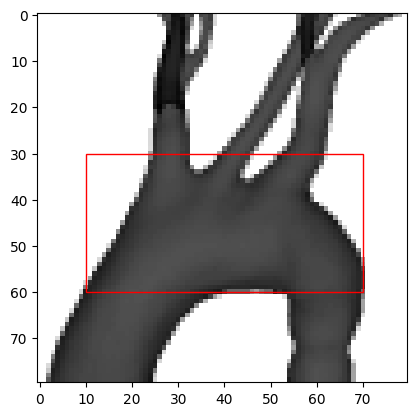

In [39]:
# initialize the environment
config = get_config(algorithm_configs[0])
config['task_kwargs']['target'] = targets[0] # set the target to bca
pprint(config)

dm_env = make_dm_env(**config['task_kwargs'])

physics = dm_env.physics 
phantom_mask = dm_env._task.get_phantom_mask(physics)
rectangle = patches.Rectangle((10, 30), 60, 30, linewidth=1, edgecolor='r', facecolor='none')
fig, ax = plt.subplots(1)
ax.add_patch(rectangle)
plt.imshow(phantom_mask, cmap='gray')
# plt.axis('off')
plt.show()

In [36]:
width_range = (10, 70)  # Range of possible width values
height_range = (30, 60)  # Range of possible height values


binary_mask = phantom_mask > 0

def test_random_pixel(point):
    x, y = point
    assert x >= width_range[0] and x <= width_range[1], "Error: x value is out of range."
    assert y >= height_range[0] and y <= height_range[1], "Error: y value is out of range."

def generate_random_point(mask, x_min, x_max, y_min, y_max):
    # get all valid coordinates within the specified rectangle
    coords = np.argwhere(mask[y_min:y_max, x_min:x_max] == 1)
    
    # return None if there are no valid pixels
    if len(coords) == 0:
        print("No valid pixels found in the given range.")
        return None

    # randomly select one of the coordinates
    random_index = np.random.randint(len(coords))
    y_coord, x_coord = coords[random_index]

    # adjust for the offset of the rectangle
    x_coord += x_min
    y_coord += y_min

    return (x_coord, y_coord)

# Let's test it with a mask
mask = np.zeros((100, 100))
mask[40:60, 40:60] = 1 # make a square region as 1

x_min, x_max = width_range
y_min, y_max = height_range

random_point = generate_random_point(mask, x_min, x_max, y_min, y_max)
test_random_pixel(random_point)
print(f'Random point: {random_point}')


Random point: (50, 40)


## Force Analysis

In [9]:
from scratch.force_prediction.force_prediction_utils import clean_transitions

human_bca_path = Path.cwd().parent / 'rl' / 'imitation' / 'trajectories' / 'phantom3_bca.npz'
transitions = np.load(human_bca_path, allow_pickle=True)
# cleans the transitions by flattening the info dict
transitions = clean_transitions(transitions, filter_keys=['forces', 'obs', 'features', 'head_pos'])

ModuleNotFoundError: No module named 'rl.imitation'

In [8]:
mean_force = np.mean(transitions['forces'], axis=0)
print('Mean force:', np.round(mean_force,4))

Mean force: 3.3645


### Path Plotting

In [10]:
data_bca = get_path('full', 'phantom3', 'bca')[1]
data_bca = np.load(data_bca, allow_pickle=True)

data_lcca = get_path('full', 'phantom3', 'lcca', seed=2)[1]
data_lcca = np.load(data_lcca, allow_pickle=True)

s=4
m="P"

fig_width = page_width *.6
figsize = (fig_width, fig_width/10*16 )
fig, ax = plt.subplots(2, 1, figsize=figsize, sharex=True, sharey=True, layout='constrained')
plot_path('phantom3', data_bca, ax=ax[0], title='BCA', n_paths=3, s=s, marker=m)
plot_path('phantom3', data_lcca, ax=ax[1], title='LCCA', n_paths=3, s=s, marker=m)
# add colorbar to the right of the plot and set its min and max values to 0 and 6
cbar = fig.colorbar(ax[0].collections[0], ax=ax.ravel().tolist(), shrink=1)
cbar.set_label('Force (N)')
plt.tight_layout()
# plt.imsave('../../figures/path_2.png', fig)
plt.show()

IndexError: list index out of range

In [4]:
def plot_path(base_image, episodes: np.array, ax=None, title=None, human=False, n_paths=1, **kwargs):
    base_image = plt.imread(BASE_IMAGES[base_image])
    # rotate the image
    base_image = np.rot90(base_image, k=3)
    base_image = np.rot90(base_image, k=3)
    base_image = np.flip(base_image, axis=1)
    if ax is None:
        fig, ax = plt.subplots(1)
    ax.imshow(base_image)
    def point2pixel(point, camera_matrix: np.ndarray = None):
        """Transforms from world coordinates to pixel coordinates for a 
        480 by 480 image"""
        camera_matrix = np.array([
            [-5.79411255e+02,  0.00000000e+00,  2.39500000e+02, -5.33073376e+01],
            [ 0.00000000e+00,  5.79411255e+02,  2.39500000e+02, -1.08351407e+02],
            [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, -1.50000000e-01],  
        ])
        x, y, z = point
        xs, ys, s = camera_matrix.dot(np.array([x, y, z, 1.0]))

        return round(xs / s), round(ys / s)
    
    for i, (episode, episode_data) in enumerate(episodes.items()):
        if i == n_paths:
            break
        episode_data = episode_data.tolist() if isinstance(episode_data, np.ndarray) else episode_data
        episode_forces = episode_data['forces']
        print(episode_data.keys())
        episode_head_positions = episode_data['head_positions']
        if not human:
            episode_head_positions = episode_head_positions[:-1]
        # transform the head positions to pixel coordinates
        episode_head_positions = np.apply_along_axis(point2pixel, 1, episode_head_positions)
        # flip the y coordinates to match the image
        episode_head_positions[:, 1] = 480 - episode_head_positions[:, 1]
        ax.scatter(episode_head_positions[:, 0], episode_head_positions[:, 1], c=episode_forces, cmap='coolwarm', **kwargs)
        ax.plot(episode_head_positions[:, 0], episode_head_positions[:, 1], c='black', linewidth=0.5)
    ax.set_xlim(0, 480)
    ax.set_ylim(0, 480)
    ax.axis('off')
    # Hide the ticks
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.set_ylabel(title)

    # Hide the spines
    for spine in ax.spines.values():
        spine.set_visible(False)
    # set subtitle and set its margin to 16px
    ax.set_title(title,fontsize=7)

### Single Phantom

NameError: name 'data_lcca' is not defined

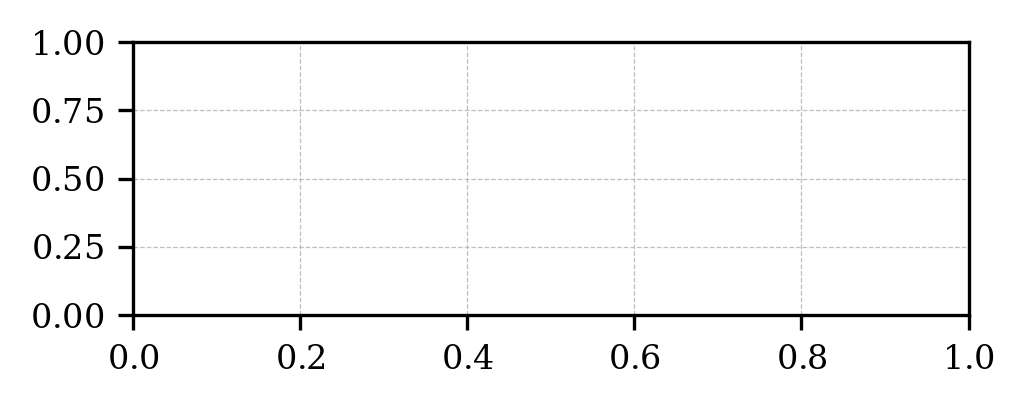

In [6]:
fig_width = page_width *.6
figsize = (fig_width, fig_width/16*6)
fig, ax = plt.subplots(1, 1, figsize=figsize, sharex=True, sharey=True, layout='constrained')
plot_path('phantom3', data_lcca, ax=ax, s=2, title='BCA')
ax.set_ylabel('BCA')
ax.axis('on')



# add colorbar to the right of the plot and set its min and max values to 0 and 6
cbar = fig.colorbar(ax.collections[0], ax=ax, shrink=1)
cbar.set_label('Force (N)')
plt.tight_layout()
plt.show()

### Double Phantom

dict_keys(['forces', 'head_positions'])


ValueError: 'c' argument has 45 elements, which is inconsistent with 'x' and 'y' with size 44.

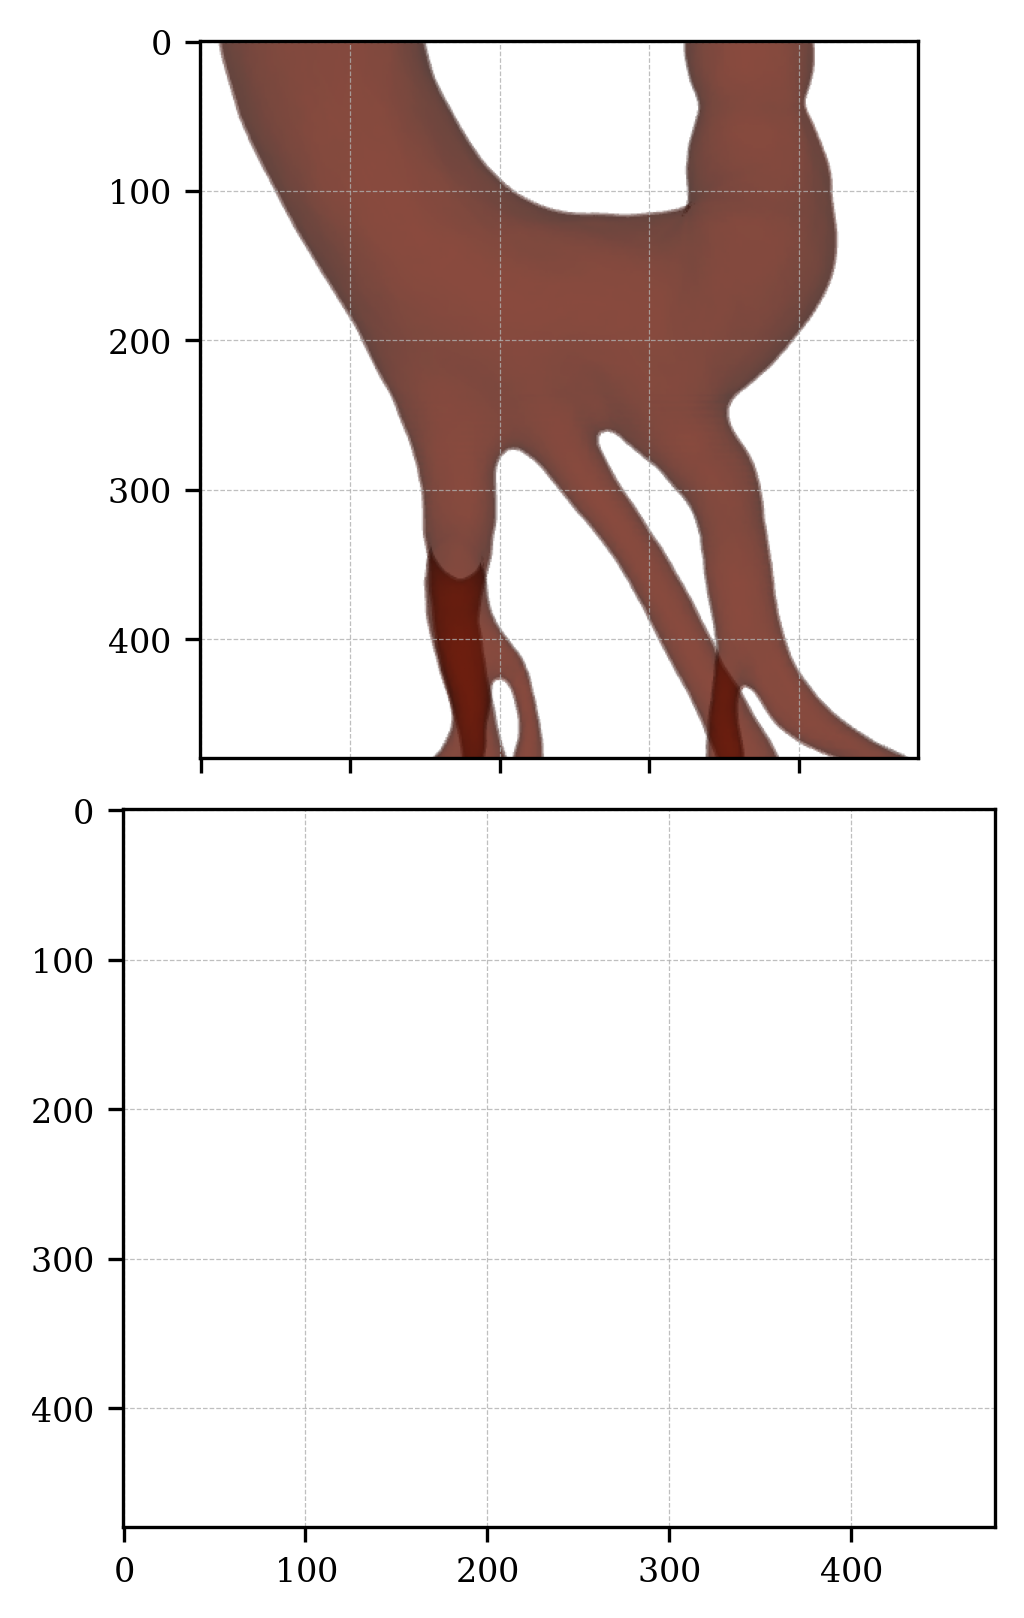

In [11]:
fig_width = page_width *.6
figsize = (fig_width, fig_width/10*16 )
fig, ax = plt.subplots(2, 1, figsize=figsize, sharex=True, sharey=True, layout='constrained')
plot_path('phantom3', data_bca, ax=ax[0], title='BCA')
plot_path('phantom3', data_lcca, ax=ax[1], title='LCCA')
# add colorbar to the right of the plot and set its min and max values to 0 and 6
cbar = fig.colorbar(ax[0].collections[0], ax=ax.ravel().tolist(), shrink=1)
cbar.set_label('Force (N)')
plt.tight_layout()
plt.show()

### Quadruple Phantom

dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])
dict_keys(['forces', 'head_positions'])
dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])
dict_keys(['forces', 'head_positions'])


RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

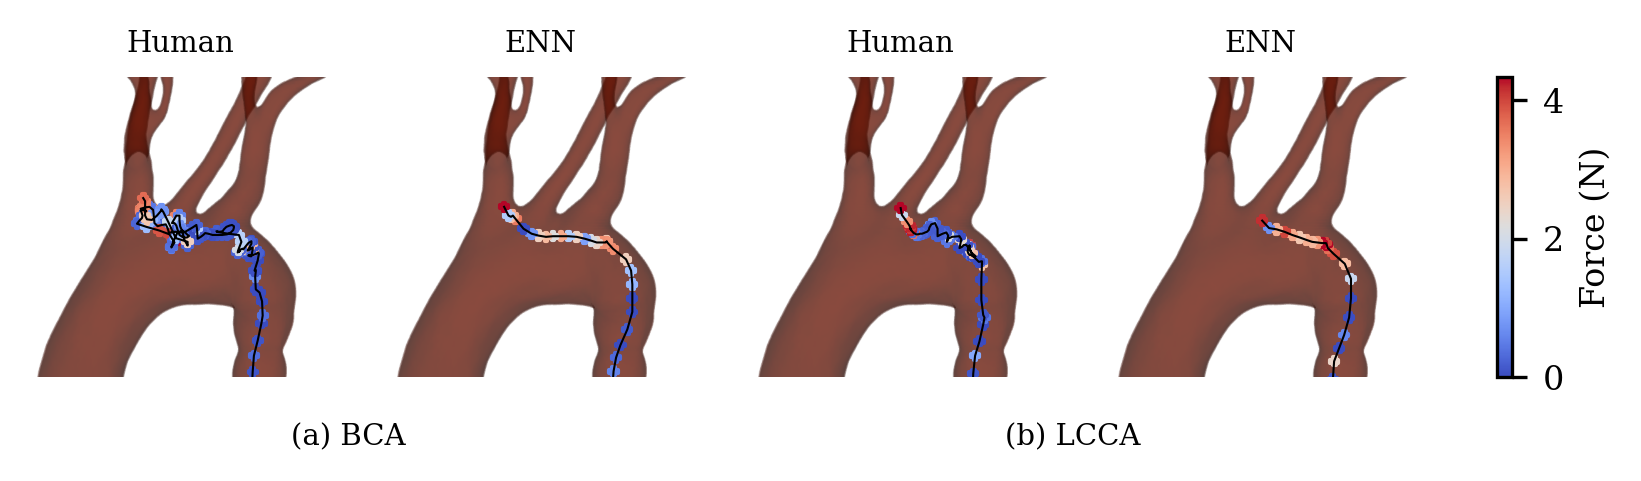

In [89]:
data_bca = get_path('full_w_her', 'phantom3', 'bca')[1]
data_bca = np.load(data_bca, allow_pickle=True)

data_lcca = get_path('full', 'phantom3', 'lcca', seed=2)[1]
data_lcca = np.load(data_lcca, allow_pickle=True)


trial = 'trial_0'
base_path = Path.cwd().parent / 'rl' / 'expert'
human_bca_path = base_path / 'phantom3' / 'bca' / trial
human_bca_trajectories = load_human_trajectories(human_bca_path, flatten=False, mapping={'force': 'forces'}) 


human_lcca_path = base_path / 'phantom3' / 'lcca' / trial
human_lcca_trajectories = load_human_trajectories(human_lcca_path, flatten=False, mapping={'force': 'forces'}) 

s=4
m="P"

fig_width = page_width * 1.35
figsize = (fig_width, fig_width/16*8)
fig, ax = plt.subplots(1, 4, figsize=figsize, sharex=True, sharey=True, constrained_layout = True)
plot_path('phantom3', human_bca_trajectories, ax=ax[0], title='Human', s=s, marker=m,human=True)
plot_path('phantom3', data_bca, ax=ax[1], title='ENN', s=s, marker=m)
plot_path('phantom3', human_lcca_trajectories, ax=ax[2], title='Human', s=s, marker=m,human=True)
plot_path('phantom3', data_lcca, ax=ax[3], title='ENN', s=s, marker=m)
ax[0].text(1.25, -0.2, "(a) BCA", transform=ax[0].transAxes, verticalalignment='center', horizontalalignment='right', fontsize=7)
ax[2].text(2.5, -0.2, "(b) LCCA", transform=ax[1].transAxes, verticalalignment='center', horizontalalignment='right', fontsize=7)
cbar = fig.colorbar(ax[3].collections[0], ax=ax.ravel().tolist(), shrink=.35)
cbar.set_label('Force (N)')
# ax[0,0].get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()

## Human Vs Algorithms Performance

### Human

In [133]:
phantom = 'phantom3'
target = 'bca'
base_image = plt.imread(BASE_IMAGES[phantom])
base_path = Path.cwd().parent / 'rl' / 'expert'
trial = 'trial_0'
# load the human data
human_bca_path = base_path / phantom / target / trial

def load_human_trajectories(path:Path, flatten=False, mapping:dict=None):
    trajectories = {}
    for episode in path.iterdir():
        trajectory_path = episode / 'trajectory.npz'
        if not trajectory_path.exists():
            continue
        episode_data = np.load(episode/ 'trajectory.npz', allow_pickle=True)
        episode_data = dict(episode_data)
        if flatten:
            for key, value in episode_data.items():
                if mapping is not None:
                    if key in mapping:
                        key = mapping[key]
                if key ==  'time':
                    continue
                trajectories.setdefault(key, []).extend(value)
        else:
            if mapping is not None:
                for key, value in mapping.items():
                    episode_data[mapping[key]] = episode_data.pop(key)
            trajectories[episode.name] = episode_data
    if flatten:
        for key, value in trajectories.items():
            trajectories[key] = np.array(value)

    return trajectories

def test_load_human_trajectories():
    path = Path.cwd().parent / 'rl' / 'expert' / 'phantom3' / 'bca' / 'trial_0'
    trajectories = load_human_trajectories(path)
    

human_bca_trajectories = load_human_trajectories(human_bca_path, flatten=True, mapping={'force': 'forces'}) 
for key, value in human_bca_trajectories.items():
    print(key, len(value))


joint_pos 1463
joint_vel 1463
head_positions 1463
forces 1463


#### To make the human_trajectories 

In [ ]:
from rl.sb3.evaluation import collate_human_trajectories, analyze_model

phantom = 'phantom3'
target = 'bca'
base_image = plt.imread(BASE_IMAGES[phantom])
base_path = Path.cwd().parent / 'rl' / 'expert'
trial = 'trial_0'
# load the human data
human_bca_path = base_path / phantom / target / trial
save_path = Path(f'{phantom}/{target}/human.npz')

collated_traj = collate_human_trajectories(human_bca_path, mapping={'force': 'forces'}, save_path=save_path)

dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])
dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])
dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])
dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])
dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])


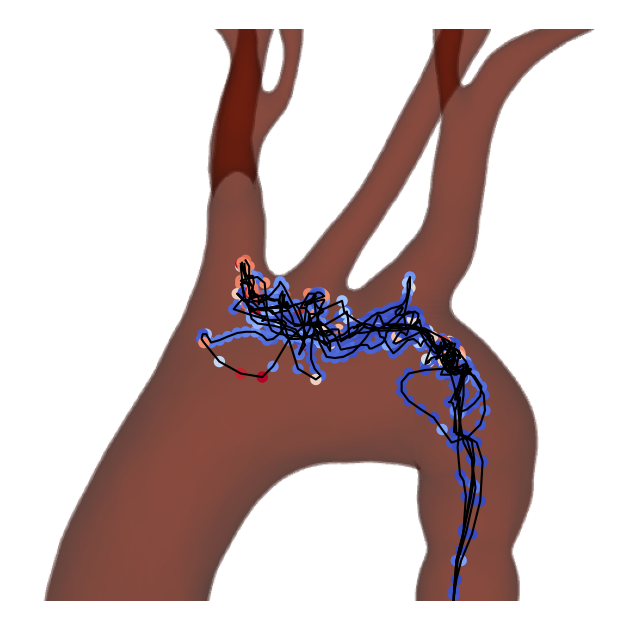

In [222]:
phantom = 'phantom3'
target = 'bca'
base_image = plt.imread(BASE_IMAGES[phantom])
base_path = Path.cwd().parent / 'rl' / 'expert'
trial = 'trial_0'
# load the human data
human_bca_path = base_path / phantom / target / trial

human_bca_path = base_path / 'phantom3' / 'bca' / trial
human_bca_trajectories = load_human_trajectories(human_bca_path, flatten=False, mapping={'force': 'forces'}) 
plot_path('phantom3', human_bca_trajectories, human=True, n_paths=5, s=3)

dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])
dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])
dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])
dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])
dict_keys(['joint_pos', 'joint_vel', 'head_positions', 'time', 'forces'])


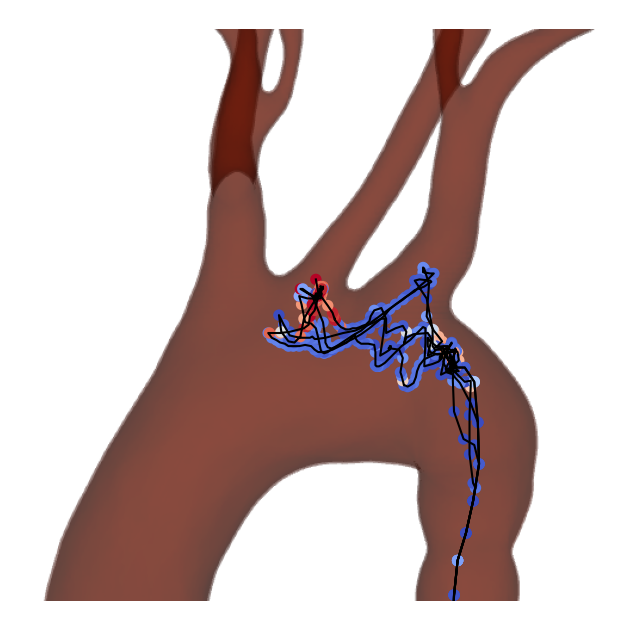

In [216]:

human_lcca_path = base_path / 'phantom3' / 'lcca' / trial
human_lcca_trajectories = load_human_trajectories(human_lcca_path, flatten=False, mapping={'force': 'forces'}) 
plot_path('phantom3', human_lcca_trajectories, human=True, n_paths=5, s=3)

## Training Line Graphs

In [12]:
from rl.sb3.evaluation import get_experiment_tensorboard_logs, plot_error_line_graph, EXPERIMENT_PATH, EVALUATION_PATH, plot_human_line

n_interpolations = 30

experiment_name = 'pixels'
phantom = 'phantom3'
target = 'bca'

# if you need to find out the experiment names
experiment_names = [experiment_name.stem for experiment_name in (EXPERIMENT_PATH / phantom / 'bca').iterdir() if experiment_name.is_dir()]
experiment_names.sort()

experiment_path = Path(f'{phantom}/{target}/{experiment_name}')
tensorboard_logs, (mean,std) = get_experiment_tensorboard_logs(experiment_path, n_interpolations=30)

ImportError: cannot import name 'plot_human_line' from 'rl.sb3.evaluation' (/home/tudorjnu/Projects/cathsim-dev-2/rl/sb3/evaluation.py)

NameError: name 'plot_human_line' is not defined

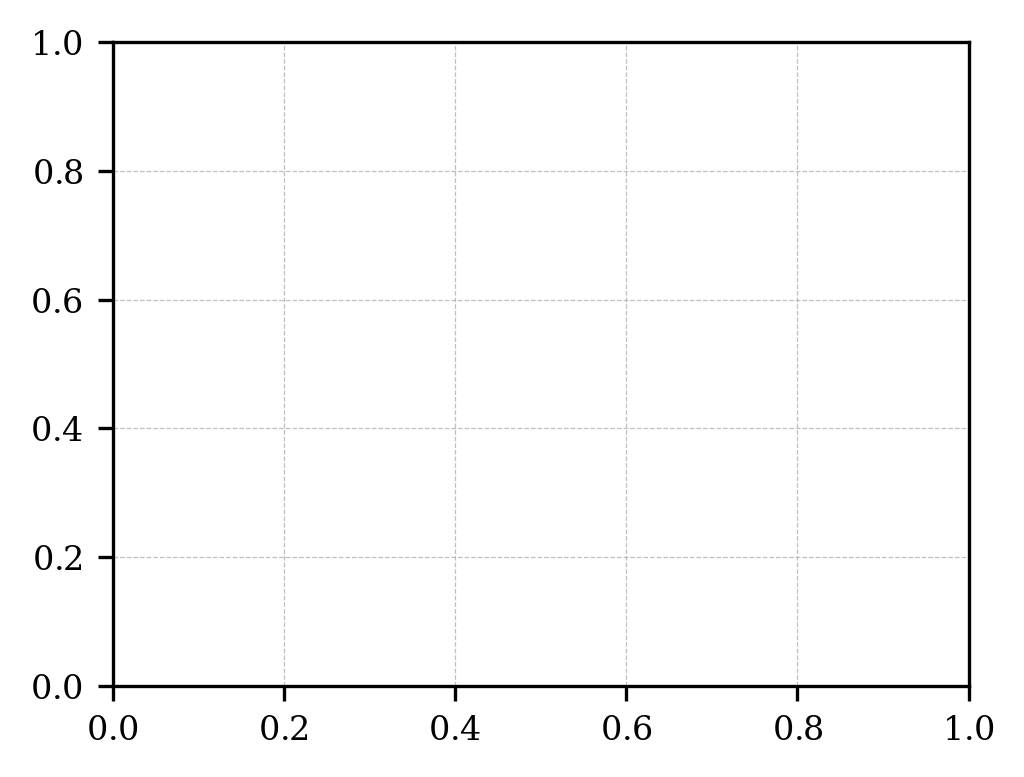

In [13]:
experiment_name = 'pixels'
phantom = 'phantom3'
target = 'lcca'


fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, layout='constrained')
plot_human_line(ax, phantom, target, n_interpolations=n_interpolations)
experiments = [experiment_name for experiment_name in (EXPERIMENT_PATH / phantom / target).iterdir() if experiment_name.is_dir()]
j = 1
for experiment in experiment_names:
    experiment_path = EXPERIMENT_PATH / phantom / target / experiment
    if not experiment_path.exists():
        j += 1
        continue
    tensorboard_logs, (mean,std) = get_experiment_tensorboard_logs(experiment_path, n_interpolations=n_interpolations)
    if len(tensorboard_logs) == 0:
        continue
    plot_error_line_graph(ax, mean, std, label=experiment_names_mapping[experiment], color=f'C{j}')
    j += 1
ax.set_title(f'{target.upper()}')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Episode Length')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))



ax.set_xlabel('Timesteps')
ax.set_ylabel('Episode Length')
# ax.legend()
plt.tight_layout()
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.legend(loc='upper left', bbox_to_anchor=(-0.15, 1.02, 1.2, 0.2), ncol=3, mode='expand', borderaxespad=0, frameon=False)
plt.show()

### Version-I

['pixels', 'pixels_mask', 'internal', 'internal_pixels', 'full']


/tmp/ipykernel_490/1639737576.py:29: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


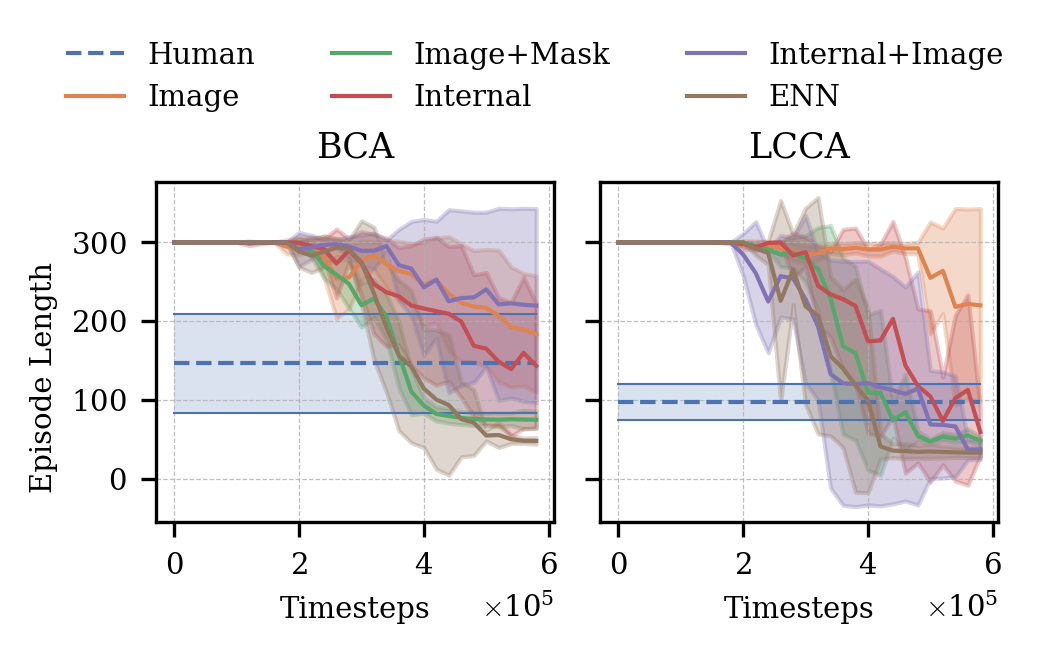

In [5]:
fig_width = page_width * .6
figsize = (fig_width, fig_width/16*9)

plt.rcParams.update({'font.size': 7})

fig, ax = plt.subplots(1, 2, figsize=(figsize[0], figsize[1]), sharex=True, sharey=True, layout='constrained')
experiment_names = list(experiment_names_mapping.keys())  
print(experiment_names)
for i, target in enumerate(['bca', 'lcca']):
    plot_human_line(ax[i], phantom, target, n_interpolations=n_interpolations)
    experiments = [experiment_name for experiment_name in (EXPERIMENT_PATH / phantom / target).iterdir() if experiment_name.is_dir()]
    j = 1
    for experiment in experiment_names:
        experiment_path = EXPERIMENT_PATH / phantom / target / experiment
        if not experiment_path.exists():
            j += 1
            continue
        tensorboard_logs, (mean,std) = get_experiment_tensorboard_logs(experiment_path, n_interpolations=n_interpolations)
        if len(tensorboard_logs) == 0:
            continue
        plot_error_line_graph(ax[i], mean, std, label=experiment_names_mapping[experiment], color=f'C{j}')
        j += 1
    ax[i].set_title(f'{target.upper()}')
    ax[i].set_xlabel('Timesteps')
    # ax[i].set_ylabel('Episode Length')
    ax[i].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
legend_handles, legend_labels = ax[0].get_legend_handles_labels()
fig.legend(legend_handles, legend_labels, loc='upper left', bbox_to_anchor=(0, .95, 1, 0.2), ncol=3, mode='expand', frameon=False)
fig.tight_layout()
# Set common labels
# fig.text(0.5, 0.04, 'Common X Label', ha='center')
fig.text(-0.01, 0.5, 'Episode Length', va='center', rotation='vertical')
fig.savefig("../../figures/episode_length.png", bbox_inches="tight")


Version-II

## Force Analysis Statistics

In [130]:
from scratch.force_prediction.force_prediction_utils import clean_transitions
path = Path.cwd().parent /  'rl' / 'imitation' / 'trajectories' / 'phantom3_lcca_10000.0.npz'
transitions = np.load(path, allow_pickle=True)
transitions = clean_transitions(transitions, filter_keys=['forces', 'obs', 'features'])

/tmp/ipykernel_28972/3941133767.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../../data/kundrat2021mrsafe.csv',parse_dates=['Time'], usecols=['Time','F_res [N]'])
/tmp/ipykernel_28972/3941133767.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']= pd.to_datetime(df['Time']).dt.time
/tmp/ipykernel_28972/3941133767.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_real, shade=True, color='C0', label='Human')
/tmp/ipykernel_28972/3941133767.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an e

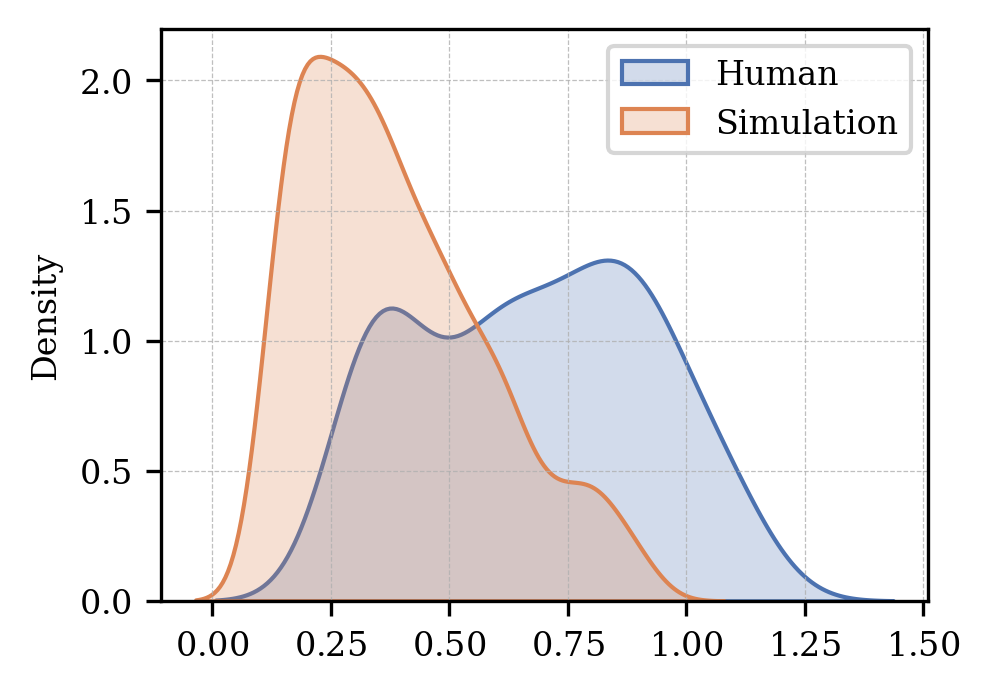

In [170]:
# make a kde plot of a normal distribution sample with the same mean and std 2.61±0.96 or 1.13±0.56
# df_real = stats.norm(0.78,0.13).rvs(100)

df = pd.read_csv('../../data/kundrat2021mrsafe.csv',parse_dates=['Time'], usecols=['Time','F_res [N]'])
df['Time'] = df['Time'].str[:-3]
df['Time']= pd.to_datetime(df['Time']).dt.time
df_real = df.groupby(df['Time']).mean()
df_real = df['F_res [N]'].to_numpy()

upper, lower = np.percentile(df_real, [75, 25])
df_real = df_real[(df_real > lower) & (df_real < upper)]
sns.kdeplot(df_real, shade=True, color='C0', label='Human')
# sim_empirical = stats.norm(1.02, 0.22).rvs(100)

phantom = 'phantom3'
target = 'bca'
base_image = plt.imread(BASE_IMAGES[phantom])
base_path = Path.cwd().parent / 'rl' / 'expert'
trial = 'trial_0'
# load the human data
human_bca_path = base_path / phantom / target / trial
human_bca_trajectories = load_human_trajectories(human_bca_path, flatten=True, mapping={'force': 'forces'}) 
df_sim = human_bca_trajectories['forces']
# cut the tails
lower, upper = np.percentile(df_sim, [25, 75])
df_sim = df_sim[(df_sim > lower) & (df_sim < upper)]
sns.kdeplot(df_sim, shade=True, color='C1', label='Simulation')
plt.legend()

In [167]:
stats.levene(df_real, df_sim)

LeveneResult(statistic=20.578189912297756, pvalue=6.549463081578785e-06)

In [168]:
stats.mannwhitneyu(df_real, df_sim)

MannwhitneyuResult(statistic=70923.0, pvalue=2.3692637899926345e-28)

## Time Analysis

In [3]:
from rl.sb3.evaluation import get_experiment_tensorboard_logs, plot_error_line_graph, EXPERIMENT_PATH, EVALUATION_PATH, plot_human_line

n_interpolations = 30

experiment_name = 'pixels'
phantom = 'phantom3'
target = 'bca'

# if you need to find out the experiment names
experiment_names = [experiment_name.stem for experiment_name in (EXPERIMENT_PATH / phantom / 'bca').iterdir() if experiment_name.is_dir()]
experiment_names.sort()

experiment_path = Path(f'{phantom}/{target}/{experiment_name}')
tensorboard_logs, (mean,std) = get_experiment_tensorboard_logs(experiment_path, n_interpolations=30, tag='time/fps')

In [7]:
from rl.sb3.evaluation import parse_tensorboard_log, get_experiment_tensorboard_logs
from rl.sb3.evaluation import get_experiment_tensorboard_logs, plot_error_line_graph, EXPERIMENT_PATH, EVALUATION_PATH, plot_human_line

phantom = 'phantom3'
target = 'bca'
config = 'full'
path = Path(f'{phantom}/{target}/{config}')

n_interpolations = 30



# _, log_path, _ = make_experiment(path)
# log_path.exists()
# print(log_path)
# log_paths = [log for log in log_path.iterdir() if log.is_dir()]
# log = log_paths[0]
# tensorboard_log = parse_tensorboard_log(log, tag='time/fps')

['pixels', 'pixels_mask', 'internal', 'internal_pixels', 'full']
/home/tudorjnu/Projects/cathsim-dev/rl/results/experiments/phantom3/bca/pixels
/home/tudorjnu/Projects/cathsim-dev/rl/results/experiments/phantom3/bca/pixels_mask
/home/tudorjnu/Projects/cathsim-dev/rl/results/experiments/phantom3/bca/internal
/home/tudorjnu/Projects/cathsim-dev/rl/results/experiments/phantom3/bca/internal_pixels
/home/tudorjnu/Projects/cathsim-dev/rl/results/experiments/phantom3/bca/full
/home/tudorjnu/Projects/cathsim-dev/rl/results/experiments/phantom3/lcca/pixels
/home/tudorjnu/Projects/cathsim-dev/rl/results/experiments/phantom3/lcca/pixels_mask
/home/tudorjnu/Projects/cathsim-dev/rl/results/experiments/phantom3/lcca/internal
/home/tudorjnu/Projects/cathsim-dev/rl/results/experiments/phantom3/lcca/internal_pixels
/home/tudorjnu/Projects/cathsim-dev/rl/results/experiments/phantom3/lcca/full


/tmp/ipykernel_503/2069437508.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


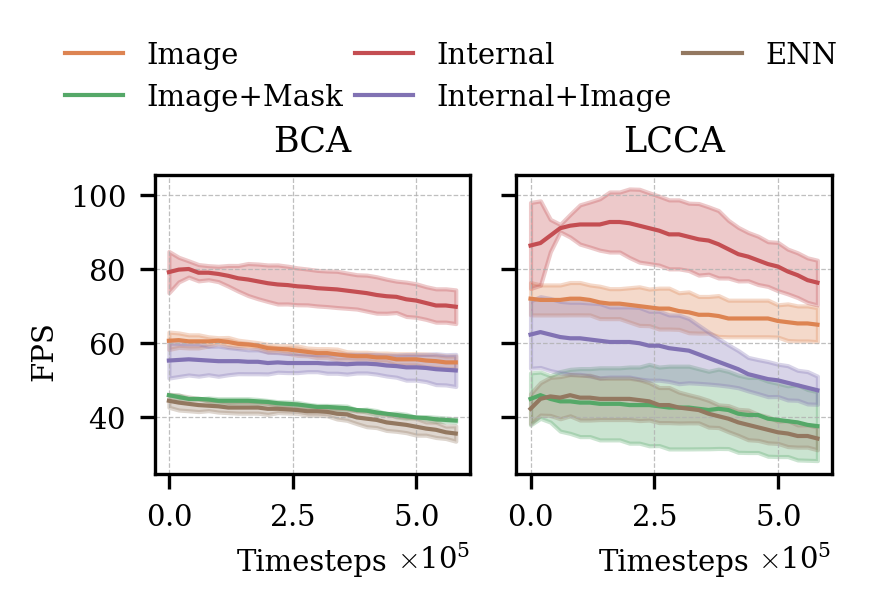

In [5]:
fig_width = page_width * .5
figsize = (fig_width, fig_width/16*10)

phantom = 'phantom3'

plt.rcParams.update({'font.size': 7})

fig, ax = plt.subplots(1, 2, figsize=(figsize[0], figsize[1]), sharex=True, sharey=True, layout='constrained')
experiment_names = list(experiment_names_mapping.keys())  
print(experiment_names)
for i, target in enumerate(['bca', 'lcca']):
    # plot_human_line(ax[i], phantom, target, n_interpolations=n_interpolations)
    experiments = [experiment_name for experiment_name in (EXPERIMENT_PATH / phantom / target).iterdir() if experiment_name.is_dir()]
    j = 1
    for experiment in experiment_names:
        experiment_path = EXPERIMENT_PATH / phantom / target / experiment
        if not experiment_path.exists():
            j += 1
            continue
        print(experiment_path)
        tensorboard_logs, (mean,std) = get_experiment_tensorboard_logs(experiment_path, n_interpolations=n_interpolations, tag='time/fps')
        if len(tensorboard_logs) == 0:
            continue
        plot_error_line_graph(ax[i], mean, std, label=experiment_names_mapping[experiment], color=f'C{j}')
        j += 1
    ax[i].set_title(f'{target.upper()}')
    ax[i].set_xlabel('Timesteps')
    # ax[i].set_ylabel('Episode Length')
    ax[i].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
legend_handles, legend_labels = ax[0].get_legend_handles_labels()
fig.legend(legend_handles, legend_labels, loc='upper left', bbox_to_anchor=(0, .95, 1, 0.2), ncol=3, mode='expand', frameon=False)
fig.tight_layout()
# Set common labels
# fig.text(0.5, 0.04, 'Common X Label', ha='center')
fig.text(-0.01, 0.5, 'FPS', va='center', rotation='vertical')
fig.savefig("../../figures/episode_time.png", bbox_inches="tight")